# Robust Varibad Analysis

In [1]:
%reload_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import cross_entropy_sampler as cem
import general_utils as utils
import analysis

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_result { max-width:90% !important; }</style>"))
np.set_printoptions(precision=4)
np.set_printoptions(linewidth=150)
np.set_printoptions(suppress=True)

/tmp/ipykernel_3007917/867683384.py:13: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Configuration

In [2]:
ENV_NAME = 'HalfCheetahBody-v0'
TITLE = ENV_NAME[:-3]
ENV_SHORT = 'hcb'
TASKS = ('mass', 'damping', 'head_size')  # 'inertia'
TASK_DIM = len(TASKS)
METHODS = ('varibad', 'cembad', 'cvrbad')
NM_MAP = dict(varibad='VariBAD', cvrbad='CVaR-ML', cembad='RoML')
SEEDS = list(range(15))  # 30
ALPHA = 0.05

### The CEM

In [3]:
TRANSFORMATION = lambda x: 2 ** (2*(x-0.5))
YLIM = (0, 2)
SMOOTH = 20
CEM_SEED = 0

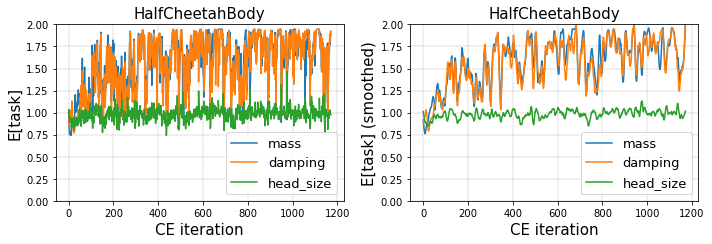

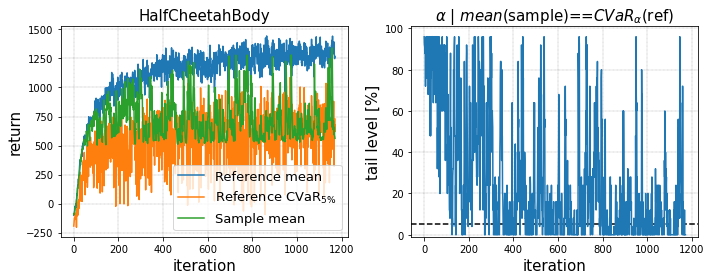

In [4]:
ce, c1, c2, axs1, axs2 = analysis.cem_analysis(
    ENV_NAME, TASK_DIM, TRANSFORMATION, YLIM, SMOOTH, title=TITLE, tasks=TASKS, seed=CEM_SEED)
plt.sca(axs1[0])
plt.savefig(f'outputs/{ENV_SHORT}_sample_dist.png', bbox_inches='tight', dpi=300)
plt.sca(axs2[0])
plt.savefig(f'outputs/{ENV_SHORT}_cem.png', bbox_inches='tight', dpi=300)

## Test results

In [5]:
%%time
rr, rra, rrm, rrc, rr0, rra0 = analysis.load_test_data(
    ENV_NAME, ENV_SHORT, METHODS, SEEDS, ALPHA, 'best', nm_map=NM_MAP)
rr

Test tasks: 1008
CPU times: user 45.2 s, sys: 207 ms, total: 45.4 s
Wall time: 45.4 s


,ep,ret,task0,task1,task2,method,seed
0,0,2163.140137,1.371916,0.510903,0.583122,VariBAD,0
1,1,2117.759277,1.371916,0.510903,0.583122,VariBAD,0
2,0,922.269714,1.893076,1.845683,1.241102,VariBAD,0
3,1,943.824890,1.893076,1.845683,1.241102,VariBAD,0
4,0,953.252930,1.863981,1.835637,0.503254,VariBAD,0
...,...,...,...,...,...,...,...
90715,1,176.733459,1.532711,1.334505,1.039396,CVaR-ML,14
90716,0,106.672272,0.686158,1.212879,1.449144,CVaR-ML,14
90717,1,161.952209,0.686158,1.212879,1.449144,CVaR-ML,14
90718,0,159.454056,1.093872,1.632107,1.025880,CVaR-ML,14


Test returns vs. task - over all seeds aggregated:
CPU times: user 2.99 s, sys: 28 ms, total: 3.02 s
Wall time: 3.02 s


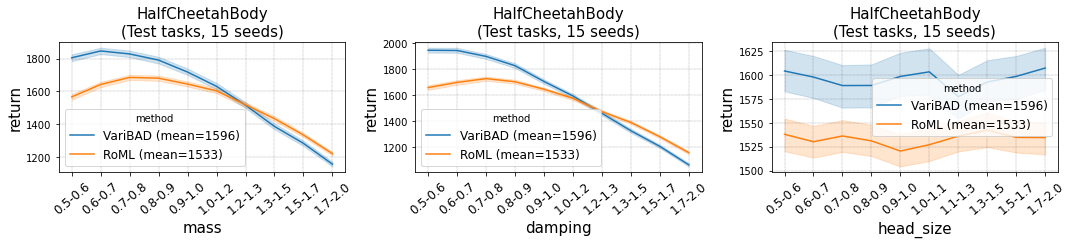

In [6]:
%%time
axs = analysis.show_test_vs_tasks(rra[rra.method!='CVaR-ML'], None, TITLE, TASKS, min_ndigits=1)
plt.savefig(f'outputs/{ENV_SHORT}_tasks.png', bbox_inches='tight', dpi=300)

In [7]:
# if FINISHED:
#     axs = analysis.summarize_test(rra0, rr0, ALPHA)

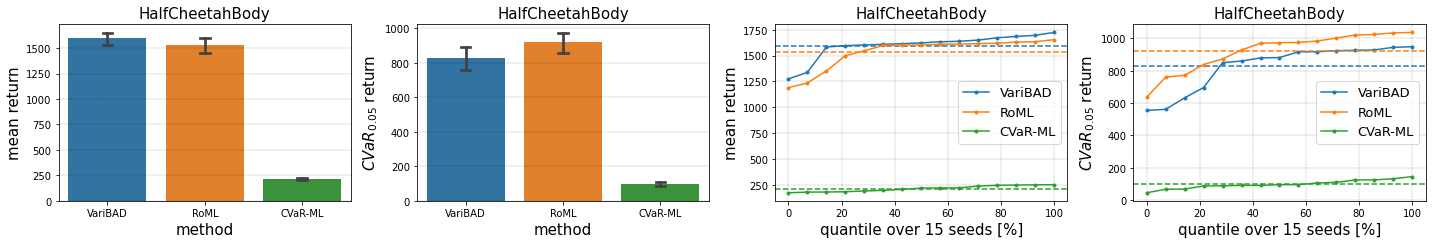

In [8]:
axs = analysis.summarize_test_over_seeds(rrm, rrc, ALPHA, TITLE, barplot=True)

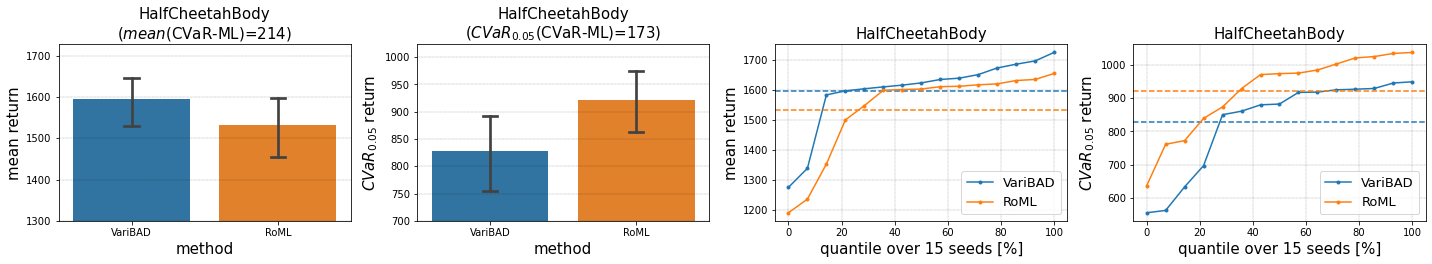

In [9]:
axs = analysis.summarize_test_over_seeds(rrm[rrm.method!='CVaR-ML'], rrc[rrc.method!='CVaR-ML'], ALPHA, TITLE, barplot=True)
axs[0].set_title(f'{TITLE}\n($mean$(CVaR-ML)={rrm.ret[rrm.method=="CVaR-ML"].mean():.0f})', fontsize=15)
axs[0].set_ylim((1300, None))
axs[1].set_title(f'{TITLE}\n($CVaR_{{{ALPHA}}}$(CVaR-ML)={analysis.get_cvar_fun(ALPHA)(rrm.ret[rrm.method=="CVaR-ML"]):.0f})', fontsize=15)
axs[1].set_ylim((700, None))
plt.savefig(f'outputs/{ENV_SHORT}_summary.png', bbox_inches='tight', dpi=300)

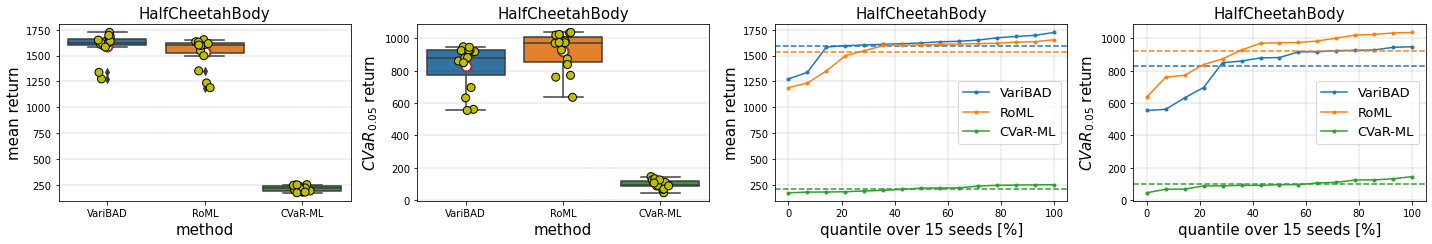

In [10]:
axs = analysis.summarize_test_over_seeds(rrm, rrc, ALPHA, TITLE)

### Final models test (not best over validation)

Test tasks: 1008
Test returns vs. task - over all seeds aggregated:
CPU times: user 50.2 s, sys: 240 ms, total: 50.5 s
Wall time: 50.5 s


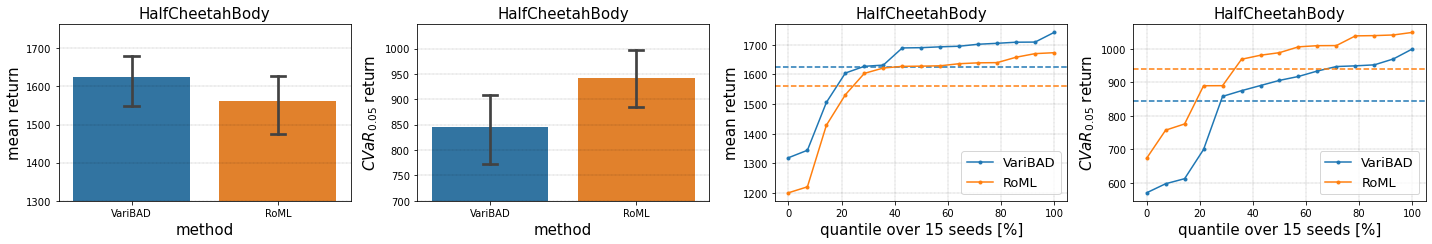

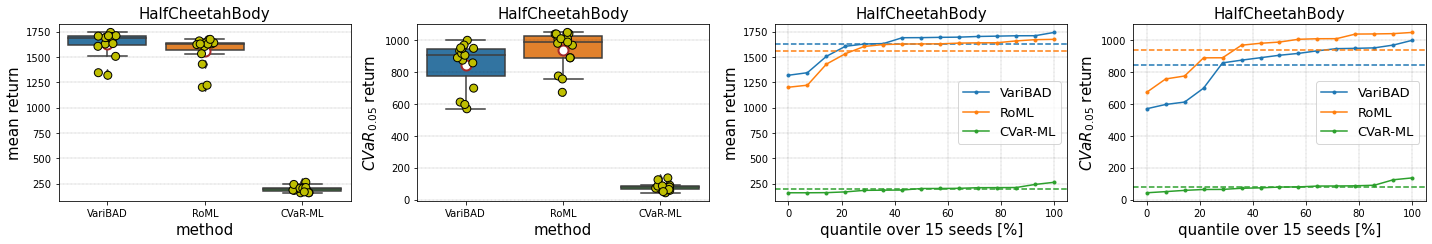

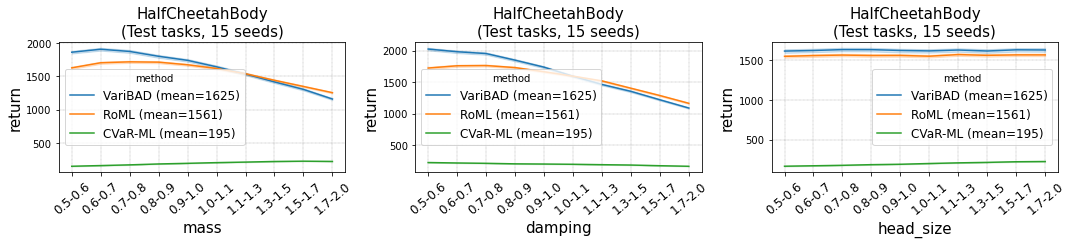

In [11]:
%%time
bb, bba, bbm, bbc, bb0, bba0 = analysis.load_test_data(
    ENV_NAME, ENV_SHORT, METHODS, SEEDS, ALPHA, 'final', nm_map=NM_MAP)

axs = analysis.summarize_test_over_seeds(bbm[bbm.method!='CVaR-ML'], bbc[bbc.method!='CVaR-ML'], ALPHA, TITLE, barplot=True)
axs[0].set_ylim((1300, None))
axs[1].set_ylim((700, None))
plt.savefig(f'outputs/{ENV_SHORT}_f_summary.png', bbox_inches='tight', dpi=300)

axs = analysis.summarize_test_over_seeds(bbm, bbc, ALPHA, TITLE)
axs2 = analysis.show_test_vs_tasks(bba, bba0, TITLE, TASKS)

## Validation results

In [12]:
%%time
dd, dda, ddm, ddc, dd0, dda0, task_dim = analysis.load_train_data(
    ENV_NAME, ENV_SHORT, METHODS, SEEDS, ALPHA, nm_map=NM_MAP)
dd

hcb_varibad_0__27:10_20:34:54
hcb_varibad_1__28:10_14:28:35
hcb_varibad_2__29:10_08:25:08
hcb_varibad_3__30:10_01:20:54
hcb_varibad_4__30:10_19:08:01
hcb_varibad_5__31:10_10:28:44
hcb_varibad_6__31:10_22:11:29
hcb_varibad_7__01:11_09:26:51
hcb_varibad_8__02:11_02:52:56
hcb_varibad_9__02:11_21:56:57
hcb_varibad_10__19:11_15:15:55
hcb_varibad_11__20:11_09:02:53
hcb_varibad_12__21:11_02:52:38
hcb_varibad_13__21:11_20:25:46
hcb_varibad_14__22:11_13:03:57
hcb_cembad_0__27:10_20:35:41
hcb_cembad_1__28:10_15:04:29
hcb_cembad_2__29:10_09:38:10
hcb_cembad_3__30:10_03:12:57
hcb_cembad_4__30:10_21:15:55
hcb_cembad_5__31:10_12:48:28
hcb_cembad_6__01:11_00:41:57
hcb_cembad_7__01:11_12:46:56
hcb_cembad_8__02:11_08:27:12
hcb_cembad_9__03:11_04:06:19
hcb_cembad_10__19:11_15:15:40
hcb_cembad_11__20:11_09:23:00
hcb_cembad_12__21:11_03:34:01
hcb_cembad_13__21:11_21:25:36
hcb_cembad_14__22:11_14:28:02
hcb_cvrbad_0__09:12_17:33:35
hcb_cvrbad_1__10:12_10:23:14
hcb_cvrbad_2__11:12_03:15:36
hcb_cvrbad_3__11:1

,iter,task_id,ep,ret,task0,task1,task2,method,seed
0,-1,0,0,-52.777351,1.318507,1.365143,1.134495,VariBAD,0
1,-1,0,1,-24.565874,1.318507,1.365143,1.134495,VariBAD,0
2,-1,1,0,-40.178707,1.792308,1.111006,0.918703,VariBAD,0
3,-1,1,1,-66.940186,1.792308,1.111006,0.918703,VariBAD,0
4,-1,2,0,-55.148106,1.154284,0.931649,0.778796,VariBAD,0
...,...,...,...,...,...,...,...,...,...
541435,9374,13,1,248.427216,1.628747,0.663934,1.281256,CVaR-ML,14
541436,9374,14,0,224.677505,1.607680,1.475475,1.254483,CVaR-ML,14
541437,9374,14,1,241.800827,1.607680,1.475475,1.254483,CVaR-ML,14
541438,9374,15,0,127.707954,0.680231,1.867724,1.214756,CVaR-ML,14


In [13]:
# axs = analysis.show_task_distribution(dda0, rra0, TASKS)

In [14]:
# %%time
# axs = analysis.show_validation_vs_tasks(dda, TASKS)

In [15]:
# %%time
# axs = analysis.show_validation_results(dda0, ALPHA)

CPU times: user 238 ms, sys: 0 ns, total: 238 ms
Wall time: 236 ms


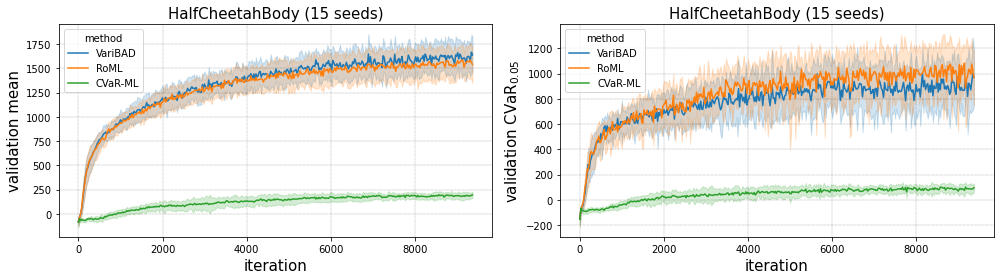

In [16]:
%%time
axs = analysis.show_validation_results_over_seeds(ddm, ddc, ALPHA, TITLE)

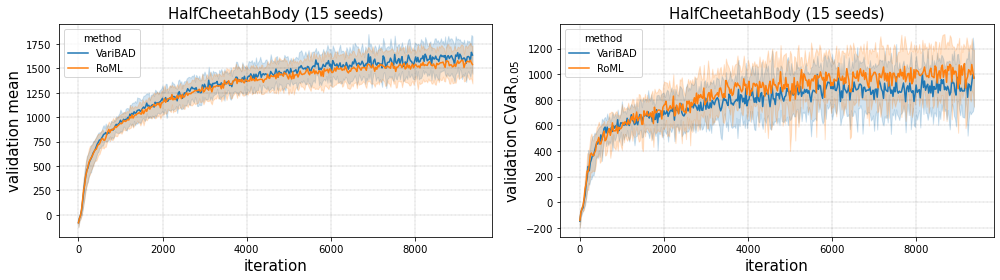

In [18]:
axs = analysis.show_validation_results_over_seeds(ddm[ddm.method!='CVaR-ML'], ddc[ddc.method!='CVaR-ML'], ALPHA, TITLE)
plt.savefig(f'outputs/{ENV_SHORT}_valid.png', bbox_inches='tight', dpi=300)